# Resilient Distributed Datasets (RDDs)

Apache Spark is a framework that allows us to work with big data. But how do we tell Spark what to do with our data? In this lesson, we’ll get familiar with using PySpark (the Python API for Spark) to load and transform our data in the form of RDDs — resilient distributed datasets.

RDDs are the foundational data structures of Spark. Newer Spark structures like DataFrames are built on top of RDDs. While DataFrames are more commonly used in industry, RDDs are not deprecated and are still called for in certain circumstances. For example, RDDs are useful for processing unstructured data, such as text or images, that don’t fit nicely in the tabular structure of a DataFrame.

So what exactly is an RDD? According to our friends at Apache, the formal definition of an RDD is “a fault-tolerant collection of elements partitioned across the nodes of the cluster that can be operated on in parallel.” Those are some complicated words! Let’s break down the three key properties of RDDs together:

* Fault-tolerant or resilient: data is copied and recoverable in the event of failure
* Partitioned or distributed: datasets are split up across the nodes in a cluster
* Operated on in parallel: tasks are executed on all the chunks of data at the same time
* Now that we have a bit more context as to what RDDs are, let’s learn how to create one with PySpark in the next exercise!

## Start Coding with PySpark

The entry point to Spark is called a SparkSession. There are many possible configurations for a SparkSession, but for now, we will simply start a new session and save it as spark:

In [17]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 

We can use Spark with data stored on a distributed file system or just on our local machine. Without additional configurations, Spark defaults to local with the number of partitions set to the number of CPU cores on our local machine (often, this is four).

The sparkContext within a SparkSession is the connection to the cluster and gives us the ability to create and transform RDDs. We can create an RDD from data saved locally using the parallelize() function. We can add an argument to specify the number of partitions, which is generally recommended as 2-4 partitions per machine. Otherwise, Spark defaults to the total number of CPU cores.

In [18]:
# default setting
rdd_par = spark.sparkContext.parallelize([])

If we are working with an external dataset, or possibly a large dataset stored on a distributed file system, we can use textFile() to create an RDD. Spark’s default is to partition the text file in 128 MB blocks, but we can also add an argument to set the number of partitions within the function.

In [19]:
rdd_txt = spark.sparkContext.textFile("rdd_text_1.txt", 10)

We can verify the number of partitions in rdd_txt using the following line:

In [20]:
rdd_txt.getNumPartitions()

10

Finally, we need to know how to end our SparkSession when we are finished with our work:

In [21]:
spark.stop()

### Practice

In [22]:
from pyspark.sql import SparkSession
student_data = [("Chris",1523,0.72,"CA"),
                ("Jake", 1555,0.83,"NY"),
                ("Cody", 1439,0.92,"CA"),
                ("Lisa",1442,0.81,"FL"),
                ("Daniel",1600,0.88,"TX"),
                ("Kelvin",1382,0.99,"FL"),
                ("Nancy",1442,0.74,"TX"),
                ("Pavel",1599,0.82,"NY"),
                ("Josh",1482,0.78,"CA"),
                ("Cynthia",1582,0.94,"CA")]

In [23]:
spark = SparkSession.builder.getOrCreate() 

In [24]:
student_rdd = spark.sparkContext.parallelize(student_data,5)

# confirm your RDD contains the correct data
student_rdd.collect()

[('Chris', 1523, 0.72, 'CA'),
 ('Jake', 1555, 0.83, 'NY'),
 ('Cody', 1439, 0.92, 'CA'),
 ('Lisa', 1442, 0.81, 'FL'),
 ('Daniel', 1600, 0.88, 'TX'),
 ('Kelvin', 1382, 0.99, 'FL'),
 ('Nancy', 1442, 0.74, 'TX'),
 ('Pavel', 1599, 0.82, 'NY'),
 ('Josh', 1482, 0.78, 'CA'),
 ('Cynthia', 1582, 0.94, 'CA')]

In [25]:
student_rdd.getNumPartitions()

5

## Transformations

Many of the Spark functions we use on RDDs are similar to those we regularly use in Python. We can also use lambda expressions within RDD functions. Lambdas allow us to apply a simple operation to an object in a single line without defining it as a function. Check out the following example of a lambda expression that adds the number 1 to its input.

In [26]:
add_one = lambda x: x+1 # apply x+1 to x
print(add_one(10)) # this will output 11

11


Let’s introduce a couple of PySpark functions that we may already be familiar with:

map() applies an operation to each element of the RDD, so it’s often constructed with a lambda expression. This map example adds 1 to each element in our RDD:

In [27]:
from pyspark.sql import SparkSession
import findspark
findspark.init()
spark = SparkSession.builder.getOrCreate()

rdd = spark.sparkContext.parallelize([1,2,3,4,5])
rdd = rdd.map(lambda x: x+1)
# rdd.collect()

In [28]:
rdd.collect()


[2, 3, 4, 5, 6]

If our RDD contains tuples, we can map the lambda expression to the elements with a specific index value. The following code maps the lambda expression to just the first element of each tuple but keeps the others in the output:

In [29]:
# input RDD [(1,2,3),(4,5,6),(7,8,9)]
rdd.map(lambda x: (x[0]+1, x[1], x[2]))
# output RDD [(2,2,3),(5,5,6),(8,8,9)]

PythonRDD[3] at RDD at PythonRDD.scala:53

filter() allows us to remove or keep data conditionally. If we want to remove all NULL values in the following RDD, we can use a lambda expression in our filter:

In [30]:
# input RDD [1,2,NULL,4,5]
rdd.filter(lambda x: x is not None)
# output RDD [1,2,4,5]

PythonRDD[4] at RDD at PythonRDD.scala:53

You may have noticed that each function took an RDD as input and returned an RDD as output. In Spark, functions with this behavior are called transformations. You can find more transformations in the official Spark documentation (https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations).

We have one final note about transformations: we can only view the contents of an RDD by using a special function like collect(), which will print the data stored in the RDD. So to view the new RDD in the previous example, we would run the following:

In [31]:
rdd.filter(lambda x: x is not None).collect()

[2, 3, 4, 5, 6]

### Practice

In [32]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

student_data = [("Chris",1523,0.72,"CA"),
                ("Jake", 1555,0.83,"NY"),
                ("Cody", 1439,0.92,"CA"),
                ("Lisa",1442,0.81,"FL"),
                ("Daniel",1600,0.88,"TX"),
                ("Kelvin",1382,0.99,"FL"),
                ("Nancy",1442,0.74,"TX"),
                ("Pavel",1599,0.82,"NY"),
                ("Josh",1482,0.78,"CA"),
                ("Cynthia",1582,0.94,"CA")]
spark = SparkSession.builder.getOrCreate()
student_rdd = spark.sparkContext.parallelize(student_data)

In [33]:
## YOUR SOLUTION HERE ##
rdd_transformation = student_rdd.map(lambda x: (x[0], x[1], x[2]*100, x[3]))

# confirm transformation is correct
rdd_transformation.collect()

[('Chris', 1523, 72.0, 'CA'),
 ('Jake', 1555, 83.0, 'NY'),
 ('Cody', 1439, 92.0, 'CA'),
 ('Lisa', 1442, 81.0, 'FL'),
 ('Daniel', 1600, 88.0, 'TX'),
 ('Kelvin', 1382, 99.0, 'FL'),
 ('Nancy', 1442, 74.0, 'TX'),
 ('Pavel', 1599, 82.0, 'NY'),
 ('Josh', 1482, 78.0, 'CA'),
 ('Cynthia', 1582, 94.0, 'CA')]

In [6]:
import findspark
findspark.init()

In [34]:
## YOUR SOLUTION HERE ##
rdd_filtered = rdd_transformation.filter(lambda x: x[2]>80)

# confirm transformation is correct
rdd_filtered.collect()

[('Jake', 1555, 83.0, 'NY'),
 ('Cody', 1439, 92.0, 'CA'),
 ('Lisa', 1442, 81.0, 'FL'),
 ('Daniel', 1600, 88.0, 'TX'),
 ('Kelvin', 1382, 99.0, 'FL'),
 ('Pavel', 1599, 82.0, 'NY'),
 ('Cynthia', 1582, 94.0, 'CA')]

## Actions

You may have noticed that transformations execute rather quickly! That’s because they didn’t execute at all. Spark executes transformations only when an action is called to return a value. This delay is why we call Spark transformations lazy. We call the transformations we do in pandas eager because they execute immediately.

So, why are Spark transformations lazy? Spark will queue up the transformations to optimize and reduce overhead once an action is called. Let’s say that we wanted to apply a map and filter to our RDD:

In [36]:
rdd = spark.sparkContext.parallelize([1,2,3,4,5])
rdd.map(lambda x: x+1).filter(lambda x: x>3)

PythonRDD[10] at RDD at PythonRDD.scala:53

Instead of following the order that we called the transformations, Spark might load the values greater than 3 into memory first and perform the map function last. This swap will save memory and time because Spark loaded fewer data points and mapped the lambda to fewer elements.

In the last exercise, Spark executed our transformations only when the action collect() was called to return the entire contents of the new RDD as a list. We generally don’t want to use collect() to pull large amounts of data into memory, so we can use take(n) to view the first n elements of a large RDD.

In [37]:
# input RDD [1,2,3,4,5]
rdd.take(3)

[1, 2, 3]

We can use the action reduce() to return fewer elements of our RDD by applying certain operators. For example, say we want to add up all the values in the RDD. We can use reduce() with a lambda to add each element sequentially.

In [38]:
# input RDD [1,2,3,4,5]
rdd.reduce(lambda x,y: x+y)

15

reduce() is powerful because it allows us to apply many arbitrary operations to an RDD — it unbinds us from searching for library functions that might not exist. However, it certainly has limitations, which we’ll dive into in the next exercise.

The key thing about actions is that, like transformations, they take an RDD as input, but they will always output a value instead of a new RDD.

### Practice

In [39]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

student_data = [("Chris",1523,0.72,"CA"),
                ("Jake", 1555,0.83,"NY"),
                ("Cody", 1439,0.92,"CA"),
                ("Lisa",1442,0.81,"FL"),
                ("Daniel",1600,0.88,"TX"),
                ("Kelvin",1382,0.99,"FL"),
                ("Nancy",1442,0.74,"TX"),
                ("Pavel",1599,0.82,"NY"),
                ("Josh",1482,0.78,"CA"),
                ("Cynthia",1582,0.94,"CA")]
spark = SparkSession.builder.getOrCreate()
student_rdd = spark.sparkContext.parallelize(student_data)
rdd_transformation = student_rdd.map(lambda x: (x[0], x[1], int(x[2]*100), x[3]))

View the first 5 elements of rdd_transformation.

In [40]:
## YOUR SOLUTION HERE ##
rdd_transformation.take(5)

[('Chris', 1523, 72, 'CA'),
 ('Jake', 1555, 83, 'NY'),
 ('Cody', 1439, 92, 'CA'),
 ('Lisa', 1442, 81, 'FL'),
 ('Daniel', 1600, 88, 'TX')]

Sum the grades in rdd_transformation and save the result as sum_gpa.

In [42]:
sum_gpa = rdd_transformation.map(lambda x: x[2]).reduce(lambda x,y: x+y)

In [43]:
sum_gpa

843

Divide sum_gpa by rdd_transformation.count() to get the average grade.

In [44]:
sum_gpa/rdd_transformation.count()

84.3

## Associative and Commutative Properties

The reduce() function we used previously is a powerful aggregation tool, but there are limitations to the operations it can apply to RDDs. Namely, reduce() must be commutative and associative due to the nature of parallelized computation.

You’ve probably heard of both those terms back in elementary math class, and they probably make sense to you in that context. However, what do they mean in Spark?

Well, it all ties back to the fact that Spark operates in parallel — tasks that have commutative and associative properties allow for parallelization.

The commutative property allows for all parallel tasks to execute and conclude without waiting for another task to complete.
The associative property allows Spark to partition and distribute our data to multiple nodes because the result will stay the same no matter how tasks are grouped.
Let’s try to break that down a bit further with math! No matter how you switch up or break down summations, they’ll always have the same result thanks to the commutative and associative properties:

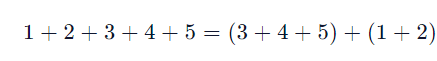

However, this is not the case with division:

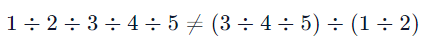

The flowchart represents one of the possible ways that our list was partitioned into three nodes and ultimately summed. No matter how our data was partitioned or which summations were completed first, the answer will be 15.

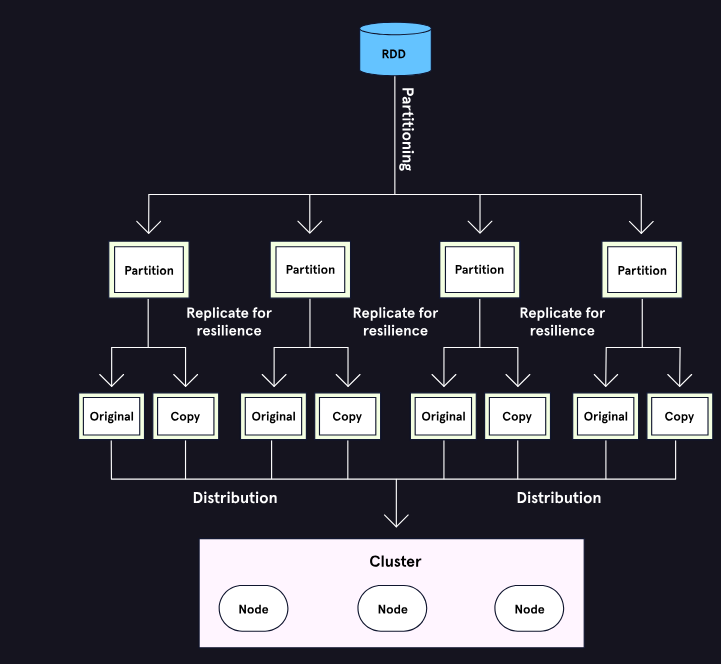

This shows that the commutative and associative properties enable parallel processing because it gives us two very important concepts: the output doesn’t depend on the order in which tasks complete (commutative) nor does it depend on how the data is grouped (associative).

### Practice

In [45]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

spark = SparkSession.builder.getOrCreate()

Run the provided code. What do you notice about the result of the summation as the number of partitions grows?

In [46]:
data = [1,2,3,4,5]
for i in range(1,5):
    rdd = spark.sparkContext.parallelize(data, i)
    print('partition: ', rdd.glom().collect())
    print('addition: ', rdd.reduce(lambda a,b: a+b))

partition:  [[1, 2, 3, 4, 5]]
addition:  15
partition:  [[1, 2], [3, 4, 5]]
addition:  15
partition:  [[1], [2, 3], [4, 5]]
addition:  15
partition:  [[1], [2], [3], [4, 5]]
addition:  15


Run the provided code. What do you notice about the result of the division as the number of partitions grows?

In [47]:
for i in range(1,5):
    rdd = spark.sparkContext.parallelize(data, i)
    print('partition: ', rdd.glom().collect())
    print('division: ', rdd.reduce(lambda a,b: a/b))

partition:  [[1, 2, 3, 4, 5]]
division:  0.008333333333333333
partition:  [[1, 2], [3, 4, 5]]
division:  3.3333333333333335
partition:  [[1], [2, 3], [4, 5]]
division:  1.875
partition:  [[1], [2], [3], [4, 5]]
division:  0.20833333333333331


## Broadcast Variables

Imagine having an RDD containing two-letter state abbreviations.

In [48]:
# list of states
states = ['FL', 'NY', 'TX', 'CA', 'NY', 'NY', 'FL', 'TX']
# convert to RDD
states_rdd = spark.sparkContext.parallelize(states)

However, we want the region instead of the state. Regions are groupings of states based on their geographic location, such as “East” or “South”. Currently, our RDD is partitioned in the Spark cluster, and we don’t know which nodes contain data on which states.

In this situation, we need to send the conversion information to all nodes because it’s very likely that each node will contain multiple distinct states. We can provide each node with information on which states belong in each region. This information that is made available to all nodes is what Spark calls broadcast variables. Let’s see how we can implement them to convert the abbreviations!

Let’s start off by creating a conversion dictionary called region that matches each state to its region:

In [49]:
# dictionary of regions
region = {"NY":"East", "CA":"West", "TX":"South", "FL":"South"}

We can then broadcast our region dictionary and apply the conversion to each element in the RDD with our map function:

In [50]:
# broadcast region dictionary to nodes
broadcast_var = spark.sparkContext.broadcast(region)
# map regions to states
result = states_rdd.map(lambda x: broadcast_var.value[x])
# view first four results
result.take(4)
# output : [‘South’, ‘East’, ‘South’, ‘West’]

['South', 'East', 'South', 'West']

This is Spark’s efficient method of sharing variables amongst its nodes (also known as shared variables). They ultimately improve performance by decreasing the amount of data transfer overhead because each node already has a cached copy of the required object. However, it should be noted that we would never want to broadcast large amounts of data because the size would be too much to serialize and send through the network.

In [51]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

spark = SparkSession.builder.getOrCreate()
student_data = [("Chris",1523,0.72,"CA"),
                ("Jake", 1555,0.83,"NY"),
                ("Cody", 1439,0.92,"CA"),
                ("Lisa",1442,0.81,"FL"),
                ("Daniel",1600,0.88,"TX"),
                ("Kelvin",1382,0.99,"FL"),
                ("Nancy",1442,0.74,"TX"),
                ("Pavel",1599,0.82,"NY"),
                ("Josh",1482,0.78,"CA"),
                ("Cynthia",1582,0.94,"CA")]
student_rdd = spark.sparkContext.parallelize(student_data)
rdd_transformation = student_rdd.map(lambda x: (x[0], x[1], int(x[2]*100), x[3]))

states = {"NY":"New York", "CA":"California", "TX":"Texas", "FL":"Florida"}

Broadcast the states dictionary to Spark Cluster. Save this object as broadcastStates.

In [52]:
## YOUR SOLUTION HERE ##
broadcastStates = spark.sparkContext.broadcast(states)

# confirm type
type(broadcastStates)

pyspark.broadcast.Broadcast

Reference broadcastStates to map the two-letter abbreviations to their full names. Save transformed rdd as rdd_broadcast.

In [54]:
## YOUR SOLUTION HERE ##
rdd_broadcast = rdd_transformation.map(lambda x: (x[0], x[1], x[2], broadcastStates.value[x[3]]))

# confirm transformation is correct
rdd_broadcast.collect()

[('Chris', 1523, 72, 'California'),
 ('Jake', 1555, 83, 'New York'),
 ('Cody', 1439, 92, 'California'),
 ('Lisa', 1442, 81, 'Florida'),
 ('Daniel', 1600, 88, 'Texas'),
 ('Kelvin', 1382, 99, 'Florida'),
 ('Nancy', 1442, 74, 'Texas'),
 ('Pavel', 1599, 82, 'New York'),
 ('Josh', 1482, 78, 'California'),
 ('Cynthia', 1582, 94, 'California')]

## Accumulator Variables

We’ve broadcasted a dictionary over to your nodes, and everything went well! We’re now curious as to how many “East” versus “West” entries there are. We could attempt to create a couple of variables to keep track of the counts, but we might run into serialization and overhead issues when datasets get really big. Thankfully, Spark has another type of shared variable that solves this issue: accumulator variables.

Accumulator variables can be updated and are primarily used as counters or sums. Conceptually, they’re similar to the sum and count functions in NumPy.

Let’s see how we can implement accumulator variables by counting the number of distinct regions. Since this will be a new dataset, let’s create an RDD first:

In [55]:
region = ['East', 'East', 'West', 'South', 'West', 'East', 'East', 'West', 'North']
rdd = spark.sparkContext.parallelize(region)

We’ll start off by initializing the accumulator variables at zero:

In [56]:
east = spark.sparkContext.accumulator(0)
west = spark.sparkContext.accumulator(0)

Let’s create a function to increment each accumulator by one whenever Spark encounters ‘East’ or ‘West’:

In [57]:
def countCoasts(r):
    if 'East' in r: east.add(1)
    elif 'West' in r: west.add(1)

We’ll take the function we created and run it against each element in the RDD.

In [58]:
rdd.foreach(lambda x: countCoasts(x))
print(east) # output: 4
print(west) # output: 3

4
3


This seems like a simple concept, but accumulator variables can be very powerful in the right situation. They can keep track of the inputs and outputs of each Spark task by aggregating the size of each subsequent transformation. Instead of counting the number of east or west coast states, we could count the number of NULL values or the resulting size of each transformation. This is important to monitor for data loss.

This doesn’t mean you should add accumulator variables to everything though. It’s best to avoid using accumulators in transformations. Whenever Spark runs into an exception, it will re-execute the tasks. This will incorrectly increment the accumulator. However, Spark will guarantee that this does not happen to accumulators in actions.

Accumulators can be great as debugging or summary tools, but they’re not infallible when used in transformations.

### Practice

In [59]:
from pyspark.sql import SparkSession
import findspark
findspark.init()


spark = SparkSession.builder.getOrCreate()
student_data = [("Chris",1523,0.72,"CA"),
                ("Jake", 1555,0.83,"NY"),
                ("Cody", 1439,0.92,"CA"),
                ("Lisa",1442,0.81,"FL"),
                ("Daniel",1600,0.88,"TX"),
                ("Kelvin",1382,0.99,"FL"),
                ("Nancy",1442,0.74,"TX"),
                ("Pavel",1599,0.82,"NY"),
                ("Josh",1482,0.78,"CA"),
                ("Cynthia",1582,0.94,"CA")]
student_rdd = spark.sparkContext.parallelize(student_data)
rdd_transformation = student_rdd.map(lambda x: (x[0], x[1], int(x[2]*100), x[3]))
states = {"NY":"New York", "CA":"California", "TX":"Texas", "FL":"Florida"}
broadcastStates = spark.sparkContext.broadcast(states)
rdd_broadcast = rdd_transformation.map(lambda x: (x[0],x[1],x[2],broadcastStates.value[x[3]]))

Create the accumulator variable that starts at 0 and name it sat_1500.

In [65]:
## YOUR SOLUTION HERE ##
sat_1500 = spark.sparkContext.accumulator(0)

# confirm type
type(sat_1500)

pyspark.accumulators.Accumulator

Create a function called count_high_sat_score that increments our accumulator by 1 whenever it encounters a score of over 1500.

In [66]:
## YOUR SOLUTION HERE ##
def count_high_sat_score(r):
    if r[1] > 1500: sat_1500.add(1)

# confirm saved as a function
print(count_high_sat_score)

<function count_high_sat_score at 0x0000029964326A70>


Call count_high_sat_score in an action that will apply the function to each element in rdd_broadcast.

In [67]:
## YOUR SOLUTION HERE ##
rdd_broadcast.foreach(lambda x: count_high_sat_score(x))

# confirm accumulator worked
print(sat_1500)

5
